#### clave quiz: linprog

# Ajuste de curvas (Regresión)


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot


In [2]:
# Encontrar \beta_0 y \beta_1 resolviendo el sistema


#Matriz inversa de A


In [3]:
# Graficar la recta encontrada junto con los puntos
#Definir puntos


#Crear la figura y definir el tamaño


#Graficar puntos y la recta ajustada


2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Encontrar \beta_0, \beta_1 y \beta_2 resolviendo el sistema
A = np.array([[1,0,0],
             [1,1,1],
             [1,2,4]])
b = np.array([1,0,1])

# \beta = inv(A)*b
#Matriz inversa de A
A1 = np.linalg.inv(A)

# Soluión \beta
beta = A1@b # @ para multiplicación matriz-vector
beta

array([ 1., -2.,  1.])

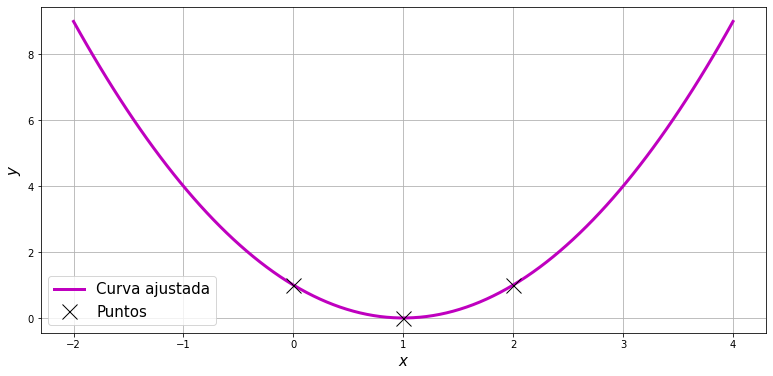

In [5]:
# La tabulación para la parábola
xnum = np.linspace(-2, 4, 100)
ynum = beta[2]*xnum**2 + beta[1]*xnum + beta[0]

# Coordenadas de los puntos a ajustar (0,1) - (1,0) - (2,1)
x = np.array([0, 1, 2])  # Componente x de los puntos
y = np.array([1, 0, 1])  # Componente y de los puntos


# Generar gráficos
plt.figure(figsize=(13,6))

# Graficar la parabola junto con los puntos
plt.plot(xnum, ynum, 'm', lw = 3, label = 'Curva ajustada')
plt.plot(x,y, 'xk', ms=15, label='Puntos')

# Etiquetas de los ejes coordenados
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.legend(loc='best', fontsize=15)
plt.grid()
plt.show()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [6]:
# Crear un conjunto de puntos ruidosos a partir de una recta
x = np.linspace(0,1,50)
y = 6*x + 4 + np.random.randn(50)

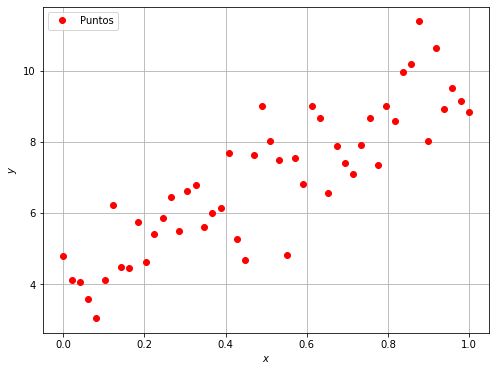

In [7]:
# Graficar
plt.figure(figsize=(8,6))

plt.plot(x,y,'or',label='Puntos')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.grid()
plt.legend(loc='best')
plt.show()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿por qué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [8]:
# Función minimize
import scipy.optimize as opt
opt.minimize?

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como `{'ineq': g_i, 'eq': h_j}`.

Primero debemos construir la función objetivo y la semilla inicial:

In [9]:
# Se vuelven a definir los puntos ruidosos
x,y

(array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
 array([ 4.79359488,  4.10719484,  4.04822296,  3.57342857,  3.04565399,
         4.12413393,  6.21863731,  4.48056846,  4.44436192,  5.74782138,
         4.62145204,  5.4117129 ,  5.86687928,  6.44845371,  5.50415417,
         6.60372406,  6.7927778 ,  5.60274345,  6.0021077 ,  6.14615364,
         7.67674496,  5.25

In [10]:
# Definimos función objetivo (Funcional de costo). 
# Suma de los errores al cuadrado
def obj1(beta, x, y): 
    yhat = beta[1]*x + beta[0]
    error = y - yhat
    return np.sum(error**2)

# Definimos el beta inicial
beta_inicial = [0,0]

In [11]:
#Obtener resultado con la función minimize
#obj: Función objetivo
#beta_inicial: Valores iniciales de los parámetros beta
# args: Puntos dados en el problema
sol1 = opt.minimize(obj1,beta_inicial,args=(x,y))

In [12]:
# Mostrar
sol1

      fun: 49.98248054687565
 hess_inv: array([[ 0.03912377, -0.05813604],
       [-0.05813604,  0.11609044]])
      jac: array([-3.33786011e-06,  1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([4.0361163 , 5.81385692])

¿Qué tan bien luce el ajuste?

In [13]:
# Coeficientes \beta_0 y \beta_1
beta = sol1.x
beta

array([4.0361163 , 5.81385692])

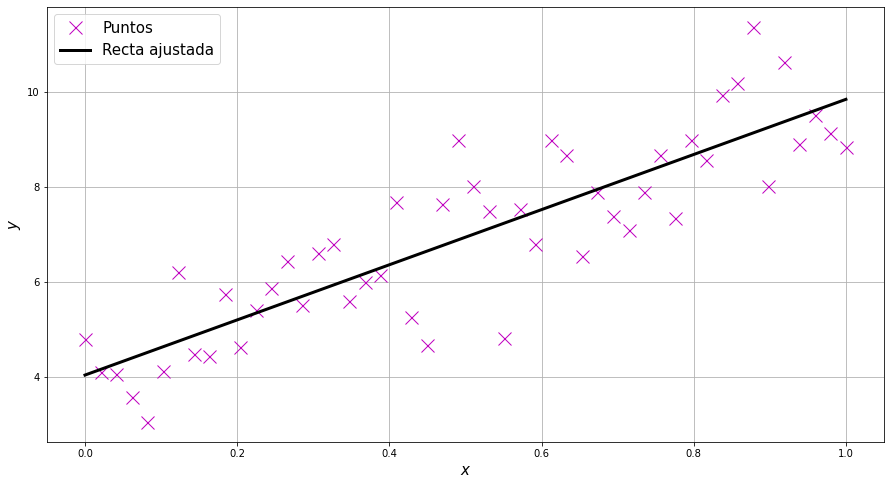

In [14]:
#Definir recta ajustada
yhat = beta[1]*x + beta[0]

# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(15,8))
plt.plot(x,y, 'xm', ms=13, label='Puntos')
plt.plot(x,yhat, 'k', lw=3, label='Recta ajustada')

plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.legend(loc='best', fontsize=15)
plt.grid()
plt.show()

Note que la pendiente es aproximadamente $6$ y el intercepto es aproximadamente $4$.

La anterior idea se puede extender a ajuste polinomial... Pero antes veamos el siguiente inconveniente.

## 1.1. Preprocesamiento de los datos

+ ### Escalado de características (Feature scaling)

<img style="float: left; margin: 0px 0px 15px 15px;" src="http://drive.google.com/uc?id=1EeaiHaj7n6qUfek5uqdepLKFJ54Vtpwj" width="250px" height="125px"/>

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://predictivehacks.com/wp-content/uploads/2020/08/2d_euclidean_distance_illustration.png" width="450px" height="125px"/>


In [15]:
(50-37)**2

169

In [16]:
(83000-67000)**2

256000000

**1. Estandarización**

$$x_{stand} = \frac{x- \text{mean(x)}}{\text{std}(x)}$$

**2. Normalización**

$$x_{norm} = \frac{x- \min(x)}{\max(x)- \min(x)}$$

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

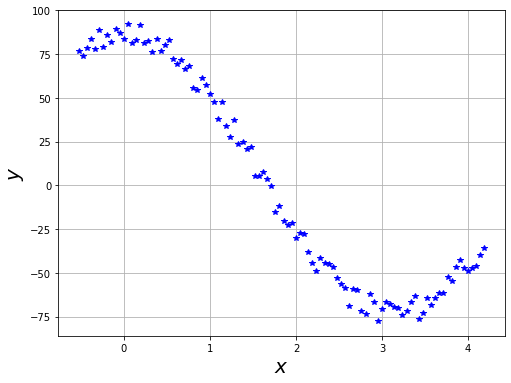

In [17]:
# Generamos 100 puntos ruidosos a partir de una senoidal
n = 100
x = np.linspace(-np.pi/6,4*np.pi/3,n)
y = 80*np.cos(x) + 15*np.random.rand(n)

#Graficamos los puntos
plt.figure(figsize=(8,6))
plt.plot(x,y,'*b')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.grid()
plt.show()

In [18]:
# Preprocesamiento de los datos
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))

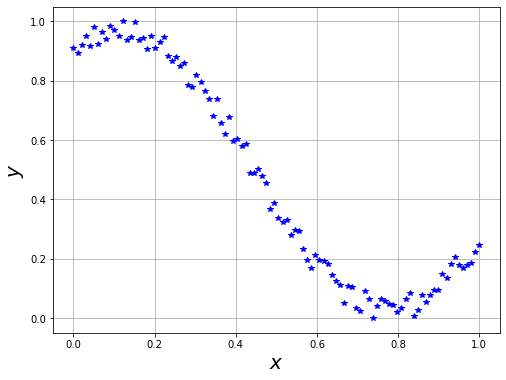

In [19]:
#Graficamos los puntos
plt.figure(figsize=(8,6))
plt.plot(x_norm,y_norm,'*b')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.grid()
plt.show()

### 2.1. ¿Se ajustará bien una recta?

In [20]:
# Definir funcion objetivo y condición inicial (semilla)
def obj1(beta, x, y):
    yhat = beta[1]*x + beta[0]
    error = y- yhat
    return np.sum(error**2)
beta_inicial = [0,0]

In [21]:
# Resolver
sol1 = opt.minimize(obj1, beta_inicial, args=(x_norm, y_norm))
sol1

      fun: 1.6950574678887353
 hess_inv: array([[ 0.01970297, -0.02940594],
       [-0.02940594,  0.05881188]])
      jac: array([7.45058060e-08, 5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 1.03768693, -1.14551778])

**Veamos $\beta$ para el ajuste con recta**

In [22]:
# Mostrar coeficientes
beta_c1 = sol1.x
beta_c1

array([ 1.03768693, -1.14551778])

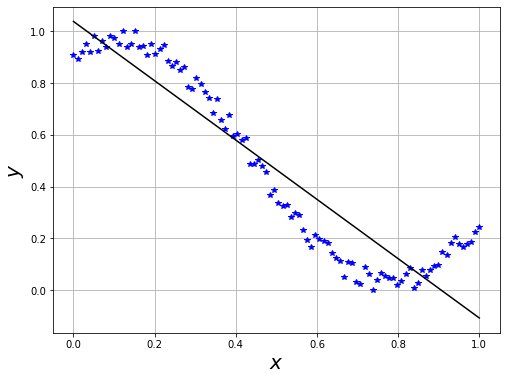

In [23]:
# Generar curva ajusta
yhat1 = beta_c1[1]*x_norm + beta_c1[0]

# Generar gráfico
plt.figure(figsize=(8,6))

#Agregar puntos y línea ajustada
plt.plot(x_norm,y_norm,'*b', label='Puntos')
plt.plot(x_norm, yhat1, 'k', label='Recta ajustada')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.grid()
plt.show()

### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [24]:
# Definir funcion objetivo y semilla
def obj2(beta, x, y):
    yhat = beta[2]*x**2 + beta[1]*x + beta[0]
    error = y- yhat
    return np.sum(error**2)
beta_inicial = [0,0,0]

In [25]:
# Resolver
sol2 = opt.minimize(obj2,beta_inicial, args=(x_norm, y_norm))
sol2

      fun: 1.2841108939609869
 hess_inv: array([[ 0.04247988, -0.16844667,  0.13949109],
       [-0.16844667,  0.90627301, -0.84961237],
       [ 0.13949109, -0.84961237,  0.85149902]])
      jac: array([ 2.23517418e-07, -5.51342964e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([ 1.17679353, -1.98867401,  0.8431562 ])

**Veamos $\beta$ para el ajuste con parábola**

In [26]:
# Mostrar coeficientes
beta_c2 = sol2.x
beta_c2

array([ 1.17679353, -1.98867401,  0.8431562 ])

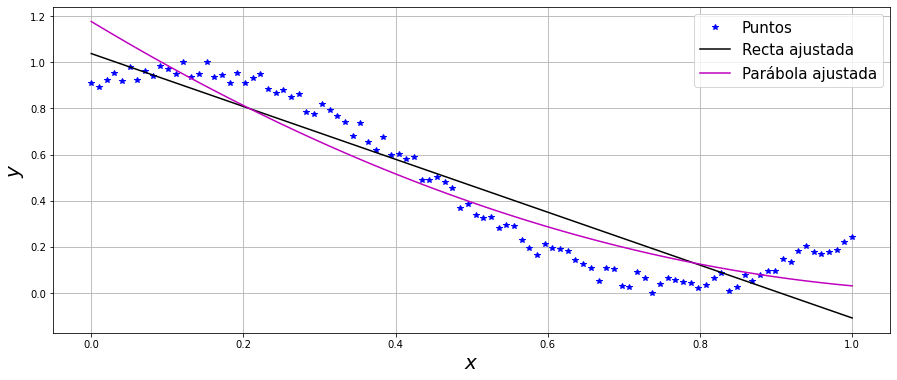

In [27]:
# Generar curva ajusta
yhat2 = beta_c2[2]*x_norm**2 +beta_c2[1]*x_norm + beta_c2[0]

# Generar gráfico
plt.figure(figsize=(15,6))

#Agregar puntos, recta y parábola ajustada
plt.plot(x_norm,y_norm,'*b', label='Puntos')
plt.plot(x_norm, yhat1, 'k', label='Recta ajustada')
plt.plot(x_norm, yhat2, 'm', label='Parábola ajustada')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.legend(loc='best', fontsize=15)
plt.grid()
plt.show()

### 2.3. Tampoco. Quizá un polinomio cúbico...

In [28]:
# Definir funcion objetivo y semilla
def objn(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2)

beta_inicial = np.zeros(4)

In [29]:
# Resolver
sol3 = opt.minimize(objn, beta_inicial, args=(x_norm,y_norm,3))
sol3

      fun: 0.09214484394475789
 hess_inv: array([[  0.07419707,  -0.55410952,   1.10192528,  -0.63882569],
       [ -0.55410952,   5.62768176, -12.68191867,   7.87625506],
       [  1.10192528, -12.68191867,  30.55530704, -19.79048835],
       [ -0.63882569,   7.87625506, -19.79048835,  13.19058827]])
      jac: array([-1.64471567e-06,  2.90013850e-06,  3.62843275e-06,  3.66847962e-06])
  message: 'Optimization terminated successfully.'
     nfev: 75
      nit: 12
     njev: 15
   status: 0
  success: True
        x: array([ 0.90476256,  1.36011571, -7.57102734,  5.60945576])

**Veamos $\beta$ para el ajuste con cúbica**

In [30]:
# Mostrar coeficientes
beta_c3 = sol3.x
beta_c3

array([ 0.90476256,  1.36011571, -7.57102734,  5.60945576])

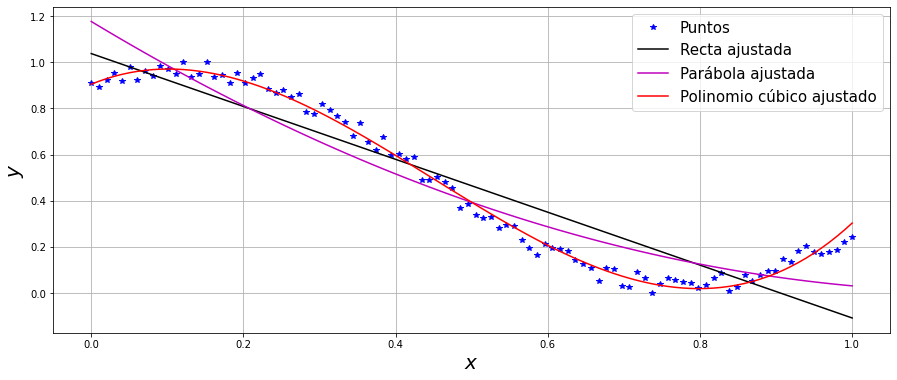

In [31]:
# Generar curva ajusta
yhat3 = beta_c3.dot([x_norm**i for i in range(4)])

# Generar gráfico
plt.figure(figsize=(15,6))

#Agregar puntos, recta, parábola y pol. cúbico ajustados
plt.plot(x_norm,y_norm,'*b', label='Puntos')
plt.plot(x_norm, yhat1, 'k', label='Recta ajustada')
plt.plot(x_norm, yhat2, 'm', label='Parábola ajustada')
plt.plot(x_norm, yhat3, 'r', label='Polinomio cúbico ajustado')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.legend(loc='best', fontsize=15)
plt.grid()
plt.show()

Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.4. Ajustemos un polinomio de grado 6...

In [44]:
# Definimos funcion objetivo y semilla

beta_inicial = np.zeros(7)

In [47]:
# Resolvemos
sol6 = opt.minimize(objn, beta_inicial, args=(x_norm, y_norm, 6))
sol6

      fun: 0.06309192771389689
 hess_inv: array([[ 1.78385787e-01, -4.09884473e+00,  3.00382181e+01,
        -9.84188819e+01,  1.60161687e+02, -1.26690196e+02,
         3.88486461e+01],
       [-4.09884473e+00,  1.36567159e+02, -1.16099009e+03,
         4.12694316e+03, -7.07247281e+03,  5.79638791e+03,
        -1.82328431e+03],
       [ 3.00382181e+01, -1.16099009e+03,  1.06463394e+04,
        -3.96688142e+04,  7.02067647e+04, -5.89004611e+04,
         1.88584125e+04],
       [-9.84188818e+01,  4.12694316e+03, -3.96688142e+04,
         1.52570769e+05, -2.76294949e+05,  2.35875522e+05,
        -7.65632801e+04],
       [ 1.60161687e+02, -7.07247281e+03,  7.02067647e+04,
        -2.76294949e+05,  5.09111757e+05, -4.40598966e+05,
         1.44598460e+05],
       [-1.26690196e+02,  5.79638791e+03, -5.89004611e+04,
         2.35875522e+05, -4.40598966e+05,  3.85520449e+05,
        -1.27674747e+05],
       [ 3.88486461e+01, -1.82328431e+03,  1.88584125e+04,
        -7.65632801e+04,  1.4459846

**De nuevo, veamos $\beta$**

In [48]:
# Mostrar coeficientes
beta_c6 = sol6.x
beta_c6

array([ 0.90242827,  1.05007351, -3.53628639, -8.71734232, 18.89889488,
       -8.01123878, -0.35047094])

**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

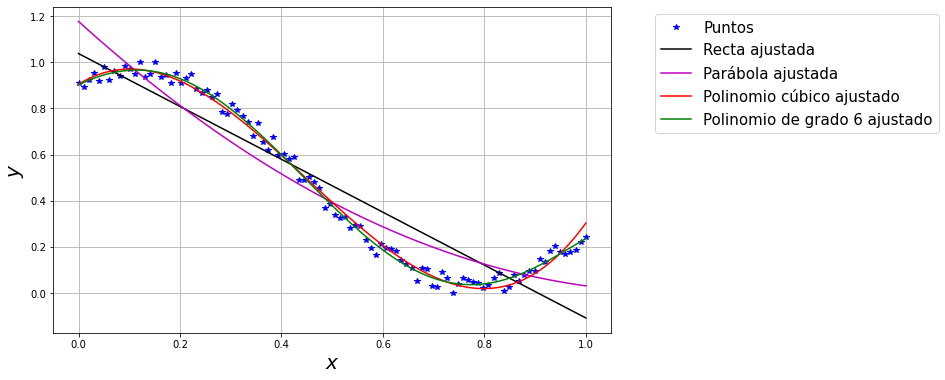

In [54]:
# Generar curva ajusta
yhat6 = beta_c6.dot([x_norm**i for i in range(7)])

# Generar gráfico
plt.figure(figsize=(10,6))

#Agregar puntos, recta, parábola y pol. cúbico ajustados
plt.plot(x_norm,y_norm,'*b', label='Puntos')
plt.plot(x_norm, yhat1, 'k', label='Recta ajustada')
plt.plot(x_norm, yhat2, 'm', label='Parábola ajustada')
plt.plot(x_norm, yhat3, 'r', label='Polinomio cúbico ajustado')
plt.plot(x_norm, yhat6, 'g', label='Polinomio de grado 6 ajustado')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.legend(bbox_to_anchor=(1.6,1), fontsize=15)
plt.grid()
plt.show()

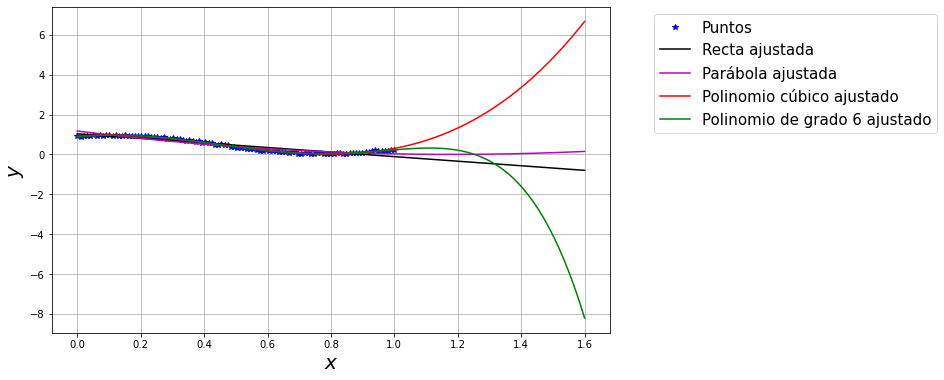

In [64]:
# Generar curva ajusta
xnum = np.linspace(0,1.6,200)
yhat1 = beta_c1.dot([xnum**i for i in range(2)])
yhat2 = beta_c2.dot([xnum**i for i in range(3)])
yhat3 = beta_c3.dot([xnum**i for i in range(4)])
yhat6 = beta_c6.dot([xnum**i for i in range(7)])

# Generar gráfico
plt.figure(figsize=(10,6))

#Agregar puntos, recta, parábola y pol. cúbico ajustados
plt.plot(x_norm,y_norm,'*b', label='Puntos')
plt.plot(xnum, yhat1, 'k', label='Recta ajustada')
plt.plot(xnum, yhat2, 'm', label='Parábola ajustada')
plt.plot(xnum, yhat3, 'r', label='Polinomio cúbico ajustado')
plt.plot(xnum, yhat6, 'g', label='Polinomio de grado 6 ajustado')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.legend(bbox_to_anchor=(1.6,1), fontsize=15)
plt.grid()
plt.show()

Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

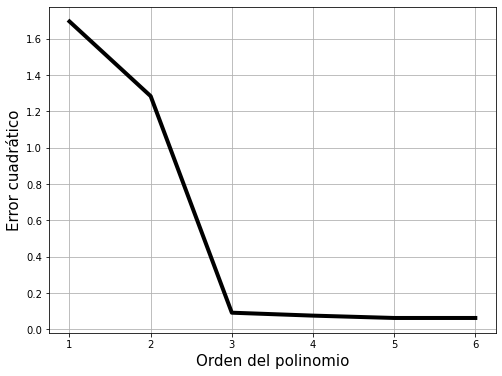

In [63]:
# Definir funcion objetivo y semilla
def objn(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2)

# Error cuadratico
ems = []

for n in range(6):
    beta_inicial = np.zeros(n+2)
    sol = opt.minimize(objn, beta_inicial, args=(x_norm, y_norm, n+1))
    ems.append(sol.fun)

plt.figure(figsize=(8,6))

xnum = np.linspace(1,6,6)
plt.plot(xnum, ems, 'k', lw =4)

plt.xlabel('Orden del polinomio', fontsize=15)
plt.ylabel('Error cuadrático', fontsize=15)

plt.grid()
plt.show()

En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [75]:
#Definir función objetivo y solucionar problema
def objn(beta,x,y,n,lam):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2) + lam*np.linalg.norm(beta)**2

beta_inicial = np.zeros(7)

In [76]:
# Solucionar
sol6_ridge = opt.minimize(objn, beta_inicial, args=(x_norm, y_norm,6,0.01))
# Mostrar parámetros beta
sol6_ridge
beta_c6_ridge = sol6_ridge.x

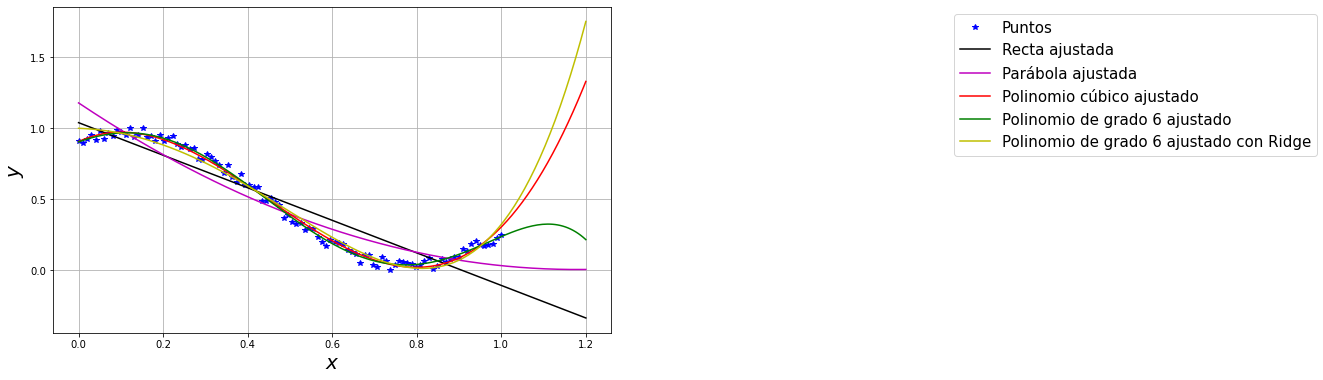

In [78]:
# Generar curva ajusta
xnum = np.linspace(0,1.2,200)
yhat1 = beta_c1.dot([xnum**i for i in range(2)])
yhat2 = beta_c2.dot([xnum**i for i in range(3)])
yhat3 = beta_c3.dot([xnum**i for i in range(4)])
yhat6 = beta_c6.dot([xnum**i for i in range(7)])
yhat6_ridge = beta_c6_ridge.dot([xnum**i for i in range(7)])

# Generar gráfico
plt.figure(figsize=(10,6))

#Agregar puntos, recta, parábola y pol. cúbico ajustados
plt.plot(x_norm,y_norm,'*b', label='Puntos')
plt.plot(xnum, yhat1, 'k', label='Recta ajustada')
plt.plot(xnum, yhat2, 'm', label='Parábola ajustada')
plt.plot(xnum, yhat3, 'r', label='Polinomio cúbico ajustado')
plt.plot(xnum, yhat6, 'g', label='Polinomio de grado 6 ajustado')
plt.plot(xnum, yhat6_ridge, 'y', label='Polinomio de grado 6 ajustado con Ridge')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.legend(bbox_to_anchor=(1.6,1), fontsize=15)
plt.grid()
plt.show()

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [40]:
#Definir función objetivo y solucionar problema


In [41]:
# Graficar

# Graficar


## 5. Actividad

1. Ajustar polinomios de grado 1 hasta grado 9 a los siguientes datos.
2. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado no sea muy alto.
3. Para el grado de polinomio elegido, realizar el ajuste con ridge con coeficiente de 0.01.
4. Comparar los beta obtenidos del grado seleccionado.

In [42]:
def f(x):
    return np.sinc(x)

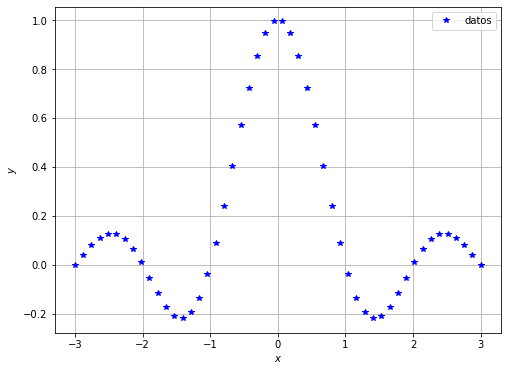

In [43]:
x1 = np.linspace(-3, 3)
y1 = f(x1)

plt.figure(figsize=(8,6))
plt.plot(x1, y1, '*b', label = 'datos')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga
</footer>